In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

In [2]:
#Demographics like age, gender, and account details of our clients
client_profile_df = pd.read_csv('df_final_demo.txt')

#A detailed trace of client interactions online
digital_footprints_1 = pd.read_csv('df_final_web_data_pt_1.txt')
digital_footprints_2 = pd.read_csv('df_final_web_data_pt_2.txt')

#A list revealing which clients were part of the grand experiment
experiment_roster = pd.read_csv('df_final_experiment_clients.txt')

In [3]:
client_profile_df

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth
0,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0
1,2304905,7.0,94.0,58.0,U,2.0,110860.30,6.0,9.0
2,1439522,5.0,64.0,32.0,U,2.0,52467.79,6.0,9.0
3,1562045,16.0,198.0,49.0,M,2.0,67454.65,3.0,6.0
4,5126305,12.0,145.0,33.0,F,2.0,103671.75,0.0,3.0
...,...,...,...,...,...,...,...,...,...
70604,7993686,4.0,56.0,38.5,U,3.0,1411062.68,5.0,5.0
70605,8981690,12.0,148.0,31.0,M,2.0,101867.07,6.0,6.0
70606,333913,16.0,198.0,61.5,F,2.0,40745.00,3.0,3.0
70607,1573142,21.0,255.0,68.0,M,3.0,475114.69,4.0,4.0


In [4]:
client_profile_df.rename(columns = {'clnt_age':'age','gendr':'gender','bal':'balance','clnt_tenure_yr':'tenure_year','clnt_tenure_mnth':'tenure_month'},inplace=True)

In [5]:
client_profile_df.drop('tenure_month', axis=1, inplace=True)

In [6]:
client_profile_df['logons_6_mnth'].value_counts()

logons_6_mnth
9.0    12350
3.0    10243
4.0    10220
7.0     9893
5.0     9254
6.0     7878
8.0     4810
2.0     3009
1.0     2938
Name: count, dtype: int64

In [7]:
client_profile_df.describe().round()

,client_id,tenure_year,age,num_accts,balance,calls_6_mnth,logons_6_mnth
count,70609.0,70595.0,70594.0,70595.0,70595.0,70595.0,70595.0
mean,5004992.0,12.0,46.0,2.0,147445.0,3.0,6.0
std,2877278.0,7.0,16.0,1.0,301509.0,2.0,2.0
min,169.0,2.0,14.0,1.0,13789.0,0.0,1.0
25%,2519329.0,6.0,32.0,2.0,37347.0,1.0,4.0
50%,5016978.0,11.0,47.0,2.0,63333.0,3.0,5.0
75%,7483085.0,16.0,59.0,2.0,137545.0,6.0,7.0
max,9999839.0,62.0,96.0,8.0,16320040.0,7.0,9.0


In [8]:
client_profile_df['gender'].value_counts()

gender
U    24122
M    23724
F    22746
X        3
Name: count, dtype: int64

In [9]:
client_profile_df['gender'] = client_profile_df['gender'].replace('X', 'U')

In [10]:
client_profile_df['gender'].value_counts()

gender
U    24125
M    23724
F    22746
Name: count, dtype: int64

In [11]:
bins = [0, 25, 50, 75, 100]  # Adjust the bin edges as needed
labels = ['Adolescent', 'Adult', 'Middle Age', 'Senior']

client_profile_df['name_age'] = pd.cut(client_profile_df['age'], bins=bins, labels=labels, right=False)

group_age = client_profile_df['name_age'].value_counts()

group_age.values

array([32931, 29952,  5919,  1792])

In [12]:
client_profile_df['name_age'].isnull().sum()

15

In [13]:
client_profile_df

,client_id,tenure_year,age,gender,num_accts,balance,calls_6_mnth,logons_6_mnth,name_age
0,836976,6.0,60.5,U,2.0,45105.30,6.0,9.0,Middle Age
1,2304905,7.0,58.0,U,2.0,110860.30,6.0,9.0,Middle Age
2,1439522,5.0,32.0,U,2.0,52467.79,6.0,9.0,Adult
3,1562045,16.0,49.0,M,2.0,67454.65,3.0,6.0,Adult
4,5126305,12.0,33.0,F,2.0,103671.75,0.0,3.0,Adult
...,...,...,...,...,...,...,...,...,...
70604,7993686,4.0,38.5,U,3.0,1411062.68,5.0,5.0,Adult
70605,8981690,12.0,31.0,M,2.0,101867.07,6.0,6.0,Adult
70606,333913,16.0,61.5,F,2.0,40745.00,3.0,3.0,Middle Age
70607,1573142,21.0,68.0,M,3.0,475114.69,4.0,4.0,Middle Age


/var/folders/jg/z9vz0kpj1t56r_y5t2ghwzxc0000gn/T/ipykernel_15727/3352444021.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=group_age.index, y=group_age.values, palette="Set3");


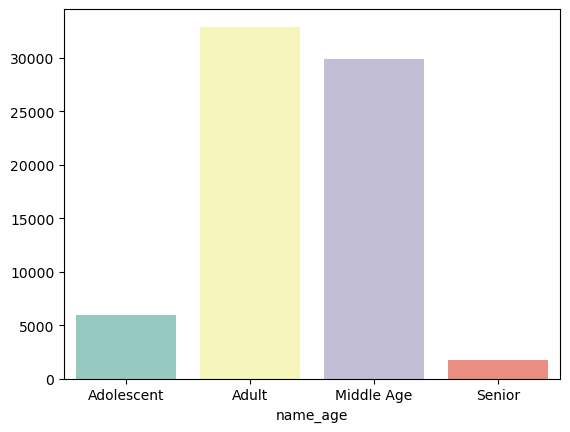

In [14]:
sns.barplot(x=group_age.index, y=group_age.values, palette="Set3");

### Conclusion:

The majority of clients are between the ages of 30 and 50 with an average of 46 years

Although many clients have an unknown gender, we can assume that they are divided fairly equal between male and female

The average years in Vanguard is 12 years

The average number of accounts per clients is 2 

In [15]:
bins = [0, 3, 6, 9]  # Adjust the bin edges as needed
labels = ['Low', 'Average', 'Frequent']

client_profile_df['logins'] = pd.cut(client_profile_df['logons_6_mnth'], bins=bins, labels=labels, right=False)

primary = client_profile_df['logins'].value_counts()

primary.values

array([29717, 22581,  5947])

/var/folders/jg/z9vz0kpj1t56r_y5t2ghwzxc0000gn/T/ipykernel_15727/2241743573.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=primary.index, y=primary.values, palette="Set3");


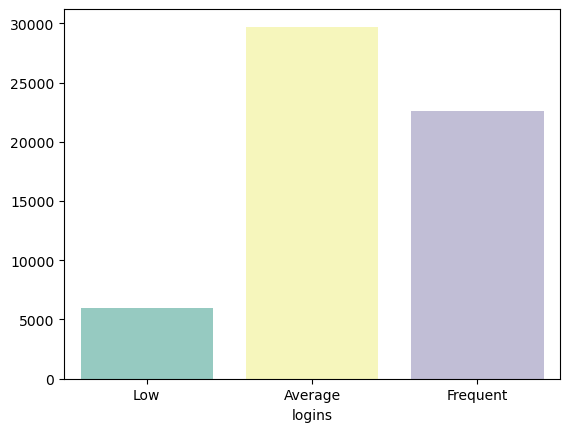

In [16]:
sns.barplot(x=primary.index, y=primary.values, palette="Set3");

In [17]:
filter= client_profile_df[client_profile_df['logons_6_mnth'] > 3]

primary_clients = filter[['age','gender','tenure_year','logons_6_mnth']]

primary_clients.describe()

,age,tenure_year,logons_6_mnth
count,54404.000000,54405.000000,54405.000000
mean,47.106233,12.190424,6.493870
std,15.787445,7.001075,1.804479
min,13.500000,2.000000,4.000000
25%,33.000000,6.000000,5.000000
50%,48.000000,11.000000,6.000000
75%,59.500000,16.000000,8.000000
max,96.000000,62.000000,9.000000


In [18]:
primary_clients.shape

(54405, 4)

In [19]:
#The primary clients are older (middle aged) and long standing (average of 12 years)